#Inverted Pendulum MDP
This notebook shows how to generate the state-action value function for the classic inverted pendulum problem. The correctness of the solution is verified by trajectory simulations.

###Problem definition
We are interested in balancing an inverted pendulum in its unsteady upright equilibrium position. The system is described by the angle-angular speed tuple $\left( \theta, \dot{\theta} \right)$, and its dynamics are

\begin{align*}
    \theta &:= \theta + \dot{\theta} dt \\
    \dot{\theta} &:= \dot{\theta} + \left( \sin \theta - \dot{\theta} + \tau \right) dt,
\end{align*}

where $dt = 0.3$ is the time period between decisions and $\tau \in \left[ -1, 1 \right]$ is the torque input. The state space is $\left( -\pi, \pi \right] \times \left[ -10, 10 \right]$. The reward function penalizes control effort while favoring an upright pendulum angular position at $0^{\circ}$:

\begin{align*}
    R\left(s, a\right) = \exp\left( \cos \theta - 1 \right) - 0.1 a^{2}.
\end{align*}

###Value iteration
To solve an MDP, we compute a policy $\pi^{\star}$ that, if followed, maximizes the expected sum of immediate rewards from any given state. The optimal policy is related to the optimal state-action value function $Q^{\star}\left(s, a\right)$, which is the expected value when starting in state $s$, taking action $a$, and then following actions dictated by $\pi^{\star}$. Mathematically, it obeys the Bellman recursion

\begin{align*}
    Q^{\star}\left(s, a\right) = R\left(s, a\right) + \sum_{s' \in \mathcal{S}} T\left(s, a, s'\right) \max_{a' \in \mathcal{A}} Q^{\star}\left(s', a'\right).
\end{align*}

The state-action value function can be computed using a dynamic programming algorithm called value iteration. To obtain the optimal policy for state $s$, we compute

\begin{align*}
    \pi^{\star} \left(s\right) = \mbox{argmax}_{a \in \mathcal{A}} Q^{\star}\left(s, a\right).
\end{align*}

###Generate state-action value function


In [1]:
using MDPs, InvertedPendulum
mdp = MDP(state_space(20, 20), action_space(200), transition, reward)
policy = value_iteration(mdp, false, "../data/qip_small.csv", false)
print("")  # suppress output

Starting value iteration...
Value iteration took 226 iterations and 1.69e+01 sec


###Visualize policy as a heat map

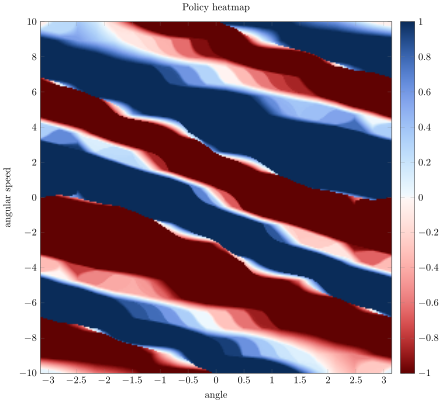

In [2]:
viz_policy(mdp, policy)

###Verify correctness
Simulate and visualize trajectory from initial state `[angle, speed]`.

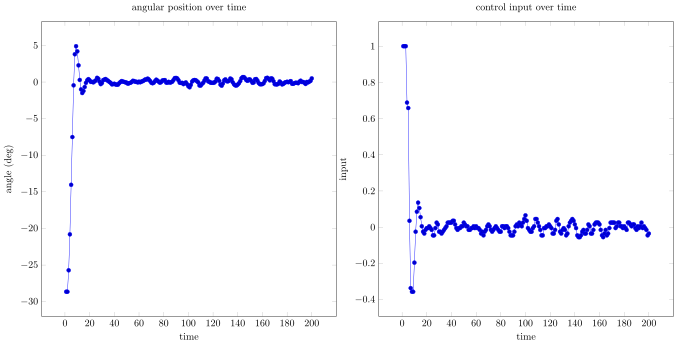

In [3]:
ss, as = simulate(mdp, policy, [-0.5, 0.0])
viz_trajectory(ss, as)